# Test Henon Map Data Iter

This is a notebook for testing the Henon Map Data Iter

## Import everything

Modify setting for pytorch

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
currentPath=os.getcwd()

Import matplotlib and others

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Import Henon Map Generator

In [3]:
from HenonMapDataGen import HenonMapDataGen

## Henon Map Data Iter

Set save path

In [4]:
savepath=os.path.join(currentPath,'..\data\HenonMap\Test')
filename='HenonMapTest3.csv'

Read the data

In [5]:
hmap=HenonMapDataGen(savepath=savepath)
hmap.read_from_CSV(filename)

In [6]:
print(hmap)

Data Info:
----------------------------------------
Data Size: 1000
Data Interval: 5
Data ParamA: 1.4, Data ParamB: 0.3
Data Bound: -1.2
Data HeavyMem: False
Data Seed:
 [0.031695751652105884, 0.051268733966253546, 0.0720924128606658, 0.09583012603424566, 0.008422309710949259, 0.07424665082080417, 0.019262511639782976, 0.044727260803307495, 0.07813401087877536, 0.016359929459163803]
----------------------------------------


Data iter parameters

In [7]:
testSetRatio=0.2
numStep=10
batchSize=2

### Test the random data iter

In [8]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize)

TrainIter

In [9]:
X,Y=next(iter(trainIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[-0.3807, -1.2000, -0.6162,  0.4634,  0.1237,  1.1064, -0.6392,  0.1104,
          0.9113,  1.2190],
        [-0.8088,  0.6085,  0.5309,  0.6923, -1.0147,  0.4319,  0.4137,  0.5105,
          0.3106, -0.0897]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8279,  0.0680,  0.7981,
         -0.0238, -1.0434],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.4962,  0.9429,  0.7944,
          1.0726,  0.6843]])


In [10]:
print('total number of train data:',len(trainIter))

total number of train data: 79


TestIter

In [11]:
X,Y=next(iter(testIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[-0.1602, -0.1647, -1.2000, -0.8699,  0.6657,  0.6509,  0.6483, -0.6354,
          0.2781,  0.4446],
        [ 0.6821, -0.0984, -0.4902, -0.1830,  0.6984,  0.4560,  1.2675,  0.9573,
          0.6375,  0.3546]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3589,  0.3622,  0.0748,
          0.6307,  0.9229],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.9135, -1.2000, -0.4301,
          0.3761,  1.0334]])


In [12]:
print('total number of test data:',len(testIter))

total number of test data: 19


Visualize the data

Text(0, 0.5, 'Y')

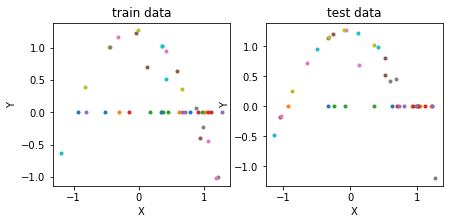

In [13]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X,Y,'.')
axes[0].set_title('train data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
for X,Y in testIter:
    axes[1].plot(X,Y,'.')
axes[1].set_title('test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

### Test the sequential data iter

In [14]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize,mask=0,shuffle=False)

TrainIter

In [15]:
i=0
for X,Y in trainIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[ 0.0317,  0.0513,  0.0721,  0.0958,  0.0084,  0.0742,  0.0193,  0.0447,
          0.0781,  0.0164],
        [ 0.7158,  0.9194,  0.0676, -1.1059,  0.6291,  0.4568, -0.3446,  0.8018,
         -0.3513,  0.6204]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0018,  1.0149,  1.0188,
          1.0202,  1.0022],
        [ 0.4568, -0.3446,  0.8018, -0.3513,  0.6204,  0.9226,  1.1096,  0.1203,
          0.4955,  0.6499]])
Data2
X=tensor([[ 1.0018,  1.0149,  1.0188,  1.0202,  1.0022, -0.3827, -0.4361, -0.4398,
         -0.4337, -0.4011],
        [ 0.9226,  1.1096,  0.1203,  0.4955,  0.6499, -0.0546, -0.8269,  1.2203,
          0.5509,  0.5948]])
Y=tensor([[-0.3827, -0.4361, -0.4398, -0.4337, -0.4011,  1.0954,  1.0382,  1.0349,
          1.0427,  1.0754],
        [-0.0546, -0.8269,  1.2203,  0.5509,  0.5948,  1.2726,  0.3755, -1.0486,
          0.7237,  0.6997]])
Data3
X=tensor([[ 1.0954,  1.0382,  1.0349,  1.0427,  1.0754, -0.7948, -0.6397, -0.6313,
         -0.652

In [16]:
print(len(trainIter))

78


TestIter

In [17]:
i=0
for X,Y in testIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[-1.0683,  0.1348,  0.5275,  0.9945,  1.0393, -0.2389,  0.6959,  0.7316,
         -0.2637, -0.6454],
        [ 1.1584,  1.2193,  0.2592, -1.2000, -0.9447, -0.9750, -1.0445,  1.1463,
         -0.6344,  0.0949]])
Y=tensor([[-0.2389,  0.6959,  0.7316, -0.2637, -0.6454,  0.5996,  0.3624,  0.4088,
          1.2010,  0.7286],
        [-0.9750, -1.0445,  1.1463, -0.6344,  0.0949,  0.0165, -0.1615, -0.7618,
          0.0765,  0.7040]])
Data2
X=tensor([[ 0.5996,  0.3624,  0.4088,  1.2010,  0.7286,  0.4250,  1.0249,  0.9855,
         -1.0985,  0.0632],
        [ 0.0165, -0.1615, -0.7618,  0.0765,  0.7040,  0.7071,  0.6501,  0.5315,
          0.8015,  0.3346]])
Y=tensor([[ 0.4250,  1.0249,  0.9855, -1.0985,  0.0632,  0.9270, -0.3618, -0.2371,
         -0.3290,  1.2130],
        [ 0.7071,  0.6501,  0.5315,  0.8015,  0.3346,  0.3050,  0.3598,  0.3760,
          0.1237,  1.0544]])
Data3
X=tensor([[ 0.9270, -0.3618, -0.2371, -0.3290,  1.2130, -0.0756,  1.1242,  1.2170,
          0.518

In [18]:
print(len(testIter))

18


Visualize the data

Text(0, 0.5, 'Y')

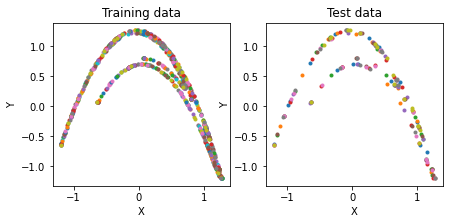

In [19]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X.flatten(),Y.flatten(),'.')
axes[0].set_title('Training data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

for X,Y in testIter:
    axes[1].plot(X.flatten(),Y.flatten(),'.')
axes[1].set_title('Test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# End of the test